# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

# Michael Noel
# 10/7/2019
# Zillow Zipcode Data

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
from pyramid.arima import auto_arima 
%matplotlib inline
data = pd.read_csv('zillow_data.csv')
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Data Preprocessing

In [221]:
#get all the timestamp columns
cols = data.columns
value_varss = cols[7:]


In [ ]:
#run this line after finding the top returns below
#this gets rid of zipcodes that have missing time series data
modifiedtopreturns = topreturns[25:]
for i,t in enumerate(modifiedtopreturns):
    for j,l in enumerate(t):
        if sort[sort['RegionID']== l[1]]['value'].isna().sum() > 0 :
            del modifiedtopreturns[i][j]


In [ ]:
#double check that all zipcodes have the data if nothing prints then it is good
for i in modifiedtopreturns:
    for c in i :
        table = sort[sort['RegionID'] == c[1]]
        if table['value'].isna().sum() > 0:
            
            print(table['value'].isna().sum(),c)
len(modifiedtopreturns)

# Step 3: EDA and Visualization

There is visualization later on, I did not want to do visualization first because there are too many zipcodes.
I did explore the data, there is a few of the zipcodes with missing data. I assumed the zillow API would be 100% right but it was not. 

# Step 4: Reshape from Wide to Long Format

In [222]:
#convert from columns to rows for the timestamps
melted = pd.melt(data,id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'],value_vars=value_varss)
melted.index = melted['variable']
melted.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value
variable,,,,,,,,,
1996-04,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1996-04,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
1996-04,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
1996-04,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
1996-04,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0


In [223]:
#convert the index to the timestamps and sort so that each zipcode
#has the timestamps in descending order
melted.index = pd.to_datetime(melted.index)
sort = melted.sort_values(by=['RegionID','variable'])
sort.head()

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,variable,value
variable,,,,,,,,,
1996-04-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,1996-04,113100.0
1996-05-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,1996-05,112800.0
1996-06-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,1996-06,112600.0
1996-07-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,1996-07,112300.0
1996-08-01,58196,1001,Agawam,MA,Springfield,Hampden,5851,1996-08,112100.0


In [31]:
#get all the unique zipcodes in a list
zipcodes = sort['RegionID'].unique()
temp_array = []
#put a value in a temp_array with the percentage return historically per zipcode
for i in zipcodes:
    x= sort[sort['RegionID'] == i]
    returnval = (x['value'][-1] - x['value'][0]) / x['value'][0]
    temp_array.append([returnval,i,x['State'][0]])

In [40]:
#get the top 5 best historical return zipcodes per state
temp_array.sort(key= lambda x: x[0])
topreturns = []
#get all the states
states = sort['State'].unique()
for i in states:
    top5returns = []
    for j in temp_array:
        #if zipcode is equal to the current state
        if j[2] == i:
            #if there are less than 5 zipcodes currently add zipcodes
            if len(top5returns) < 5:
                top5returns.append([j[0],j[1]])
                top5returns.sort(key = lambda x : x[0])
            else:
                #if the current zipcode is greater historically than the 5th best current
                #then put it in list and then resort the top5 zipcodes for that state
                if j[0] > top5returns[0][0]:
                    top5returns[0] = [j[0],j[1]]
                    top5returns.sort(key = lambda x: x[0])
    topreturns.append(top5returns)
topreturns[45]

[[1.5728100113765642, 95937],
 [1.5932926829268292, 95955],
 [1.6672278338945006, 95926],
 [1.7719442165709598, 95930],
 [2.8440611664295874, 95893]]

# Step 5: ARIMA Modeling  and Prophet Modeling

In [126]:
from fbprophet import Prophet as proph
from math import sqrt
from sklearn.metrics import mean_squared_error
results = {}
counter = 0
#for i in topreturns:       <<<<< use this in the beginning 
for i in modifiedtopreturns:
    for c in i :
        table = sort[sort['RegionID'] == c[1]]
        X = table['variable']
        y = table['value']
        aic = []
        bic = []
        mse = []
    #account  for the split validation test train split
    #pyramid arima needs to be differenced or turned stationary first
    #facebook prophet does not since it is not ARIMA model
        for j in [.6,.7,.8]:
            
            split = int(len(X)*j)
            X_train = X[0:split]
            X_test = X[split:len(X)]
            y_train = y[0:split]
            y_test = y[split:len(y)]
            #arima modeling was not working probably because of the parameter tuning 
            """
            model = auto_arima(y=y_train,start_p=0,start_q=0,max_p=6,max_d=7,max_q=8,start_P=0,start_Q=0,max_P=6,max_D=7,max_Q=8,maxiter=300)
            order = model.get_params()['order']
            # check if random walk
            if order == (0,0,0) or (0,1,0):
                break
            else:
                aic.append(model.aic())
                bic.append(model.bic())
            """

            #make facebook model    
            FBModel = proph(interval_width=0.95)
            FB = pd.DataFrame(data=[X_test,y_test])
            FB = FB.T
            FB.sort_values(by='variable',ascending=True,inplace=True)
            FB.head()
            FB_train = pd.DataFrame(data=[X_train,y_train])
            FB_train = FB_train.T
            FB_train.sort_values(by='variable',ascending=True,inplace=True)
            FB.columns = ['ds','y']
            FB_train.columns = ['ds','y']
            FBModel.fit(FB_train)
            forecastFB = FBModel.predict(FB)
            FBprediction = forecastFB['yhat']
            MeanSquaredError = sqrt(mean_squared_error(y_test,FBprediction))
            mse.append(MeanSquaredError)
            print(mse)
        #add aic bic mse
        print(mse)
        results[c[1]] = {'mse':(sum(mse)/3)}
    #run fb model on the whole time series and predict in the future
        FBModel = proph(interval_width=0.95)
        FB = pd.DataFrame(data=[X,y])
        FB = FB.T
        FB.sort_values(by='variable',ascending=True,inplace=True)
        FB_train = pd.DataFrame(data=[X,y])
        FB_train = FB_train.T
        FB_train.sort_values(by='variable',ascending=True,inplace=True)
        FB.columns = ['ds','y']
        FB_train.columns = ['ds','y']
        FBModel.fit(FB)

        forecast1yr = FBModel.make_future_dataframe(periods=12)
        forecastFB1yr = FBModel.predict(forecast1yr)
        forecast2yr = FBModel.make_future_dataframe(periods=24)
        forecastFB2yr = FBModel.predict(forecast2yr)
        forecast4yr = FBModel.make_future_dataframe(periods=48)
        forecastFB4yr = FBModel.predict(forecast4yr)
        FBprediction1yr = forecastFB1yr['yhat']

        FBprediction2yr = forecastFB2yr['yhat']

        FBprediction4yr = forecastFB4yr['yhat']
        #add the last value in the prediction as the 1yr 2yr and 4yr prediction
        results[c[1]]['1yr'] = FBprediction1yr.iloc[-1]
        results[c[1]]['2yr'] = FBprediction2yr.iloc[-1]
        results[c[1]]['4yr'] = FBprediction4yr.iloc[-1]
        results[c[1]]['current'] = y.iloc[-1]
        counter += 1
        print(" {} progress so far".format(counter))
#results

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

[9255.93527724511]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[9255.93527724511, 9013.322745559302]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[9255.93527724511, 9013.322745559302, 13388.033506654983]
[9255.93527724511, 9013.322745559302, 13388.033506654983]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 1 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[10992.999396003932]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[10992.999396003932, 27273.331054030878]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[10992.999396003932, 27273.331054030878, 20316.900255327604]
[10992.999396003932, 27273.331054030878, 20316.900255327604]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 2 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[7696.172153706142]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[7696.172153706142, 19023.72786584509]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[7696.172153706142, 19023.72786584509, 2159.490806867317]
[7696.172153706142, 19023.72786584509, 2159.490806867317]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 3 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[43144.05017471212]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[43144.05017471212, 27330.967566627667]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[43144.05017471212, 27330.967566627667, 37132.150198255214]
[43144.05017471212, 27330.967566627667, 37132.150198255214]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 4 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[10749.43711437694]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[10749.43711437694, 29295.972202903617]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[10749.43711437694, 29295.972202903617, 17923.11042043686]
[10749.43711437694, 29295.972202903617, 17923.11042043686]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 5 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[113251.83785867537]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[113251.83785867537, 81117.21623777406]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[113251.83785867537, 81117.21623777406, 52819.4735359664]
[113251.83785867537, 81117.21623777406, 52819.4735359664]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 6 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[54729.63786390472]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[54729.63786390472, 96145.38453690306]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[54729.63786390472, 96145.38453690306, 24901.89898288022]
[54729.63786390472, 96145.38453690306, 24901.89898288022]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 7 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[47616.744691753156]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[47616.744691753156, 86569.10291600726]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[47616.744691753156, 86569.10291600726, 36601.1354473642]
[47616.744691753156, 86569.10291600726, 36601.1354473642]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 8 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[33634.15973492626]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[33634.15973492626, 36136.59623817024]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[33634.15973492626, 36136.59623817024, 46291.68171256981]
[33634.15973492626, 36136.59623817024, 46291.68171256981]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 9 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[91865.20210461719]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[91865.20210461719, 34569.649188825344]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[91865.20210461719, 34569.649188825344, 58570.684699043995]
[91865.20210461719, 34569.649188825344, 58570.684699043995]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 10 progress so far


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[28175.07814923169]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[28175.07814923169, 27655.561546653113]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[28175.07814923169, 27655.561546653113, 36412.774578369426]
[28175.07814923169, 27655.561546653113, 36412.774578369426]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 11 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[85365.92891874896]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[85365.92891874896, 65821.02725523543]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[85365.92891874896, 65821.02725523543, 37932.78871111978]
[85365.92891874896, 65821.02725523543, 37932.78871111978]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 12 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[71495.48418206841]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[71495.48418206841, 89902.59394642472]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[71495.48418206841, 89902.59394642472, 33214.99657195582]
[71495.48418206841, 89902.59394642472, 33214.99657195582]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 13 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[52361.918984538475]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[52361.918984538475, 60314.28675013974]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[52361.918984538475, 60314.28675013974, 51063.394309307005]
[52361.918984538475, 60314.28675013974, 51063.394309307005]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 14 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[129859.80599935027]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[129859.80599935027, 116871.49244685206]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[129859.80599935027, 116871.49244685206, 53752.03628054139]
[129859.80599935027, 116871.49244685206, 53752.03628054139]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 15 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[10515.350722638324]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[10515.350722638324, 31301.452795292043]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[10515.350722638324, 31301.452795292043, 20587.667024020273]
[10515.350722638324, 31301.452795292043, 20587.667024020273]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 16 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[12487.942601018884]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[12487.942601018884, 39155.51876142835]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[12487.942601018884, 39155.51876142835, 26043.84013788942]
[12487.942601018884, 39155.51876142835, 26043.84013788942]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 17 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[24813.351783747]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[24813.351783747, 48836.88957311087]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[24813.351783747, 48836.88957311087, 22211.46245456314]
[24813.351783747, 48836.88957311087, 22211.46245456314]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 18 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[20987.624983209407]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[20987.624983209407, 51102.37251756508]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[20987.624983209407, 51102.37251756508, 17145.172390505944]
[20987.624983209407, 51102.37251756508, 17145.172390505944]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 19 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[14508.886555808951]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[14508.886555808951, 44970.43849764057]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[14508.886555808951, 44970.43849764057, 22487.220510507184]
[14508.886555808951, 44970.43849764057, 22487.220510507184]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 20 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[47781.735554490166]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[47781.735554490166, 123436.86724031845]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[47781.735554490166, 123436.86724031845, 76848.57854455132]
[47781.735554490166, 123436.86724031845, 76848.57854455132]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 21 progress so far
[26772.590284977436]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

[26772.590284977436, 5120.26219098331]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[26772.590284977436, 5120.26219098331, 11052.318329464953]
[26772.590284977436, 5120.26219098331, 11052.318329464953]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 22 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[19387.4864343296]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[19387.4864343296, 3600.6912026907607]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[19387.4864343296, 3600.6912026907607, 3595.8183655920384]
[19387.4864343296, 3600.6912026907607, 3595.8183655920384]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 23 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[25953.28937944285]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[25953.28937944285, 26753.4025314817]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[25953.28937944285, 26753.4025314817, 13461.762063369348]
[25953.28937944285, 26753.4025314817, 13461.762063369348]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 24 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[108133.93922422644]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[108133.93922422644, 225460.5817114251]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[108133.93922422644, 225460.5817114251, 129788.84528017929]
[108133.93922422644, 225460.5817114251, 129788.84528017929]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 25 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[377176.60141458974]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[377176.60141458974, 319224.43396070076]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[377176.60141458974, 319224.43396070076, 108017.62029787125]
[377176.60141458974, 319224.43396070076, 108017.62029787125]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 26 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[226561.22327356582]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[226561.22327356582, 268129.8518379426]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[226561.22327356582, 268129.8518379426, 214220.67190359463]
[226561.22327356582, 268129.8518379426, 214220.67190359463]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 27 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[127579.03301840308]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[127579.03301840308, 336890.25004727923]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

[127579.03301840308, 336890.25004727923, 201521.08469320298]
[127579.03301840308, 336890.25004727923, 201521.08469320298]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 28 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[122111.2698611553]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[122111.2698611553, 249591.70647338234]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[122111.2698611553, 249591.70647338234, 98448.16853526211]
[122111.2698611553, 249591.70647338234, 98448.16853526211]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 29 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[23638.22036210865]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[23638.22036210865, 61406.56437002949]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[23638.22036210865, 61406.56437002949, 31828.508424584157]
[23638.22036210865, 61406.56437002949, 31828.508424584157]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 30 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[8133.740801159887]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[8133.740801159887, 4463.783446041737]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[8133.740801159887, 4463.783446041737, 3988.8435264534637]
[8133.740801159887, 4463.783446041737, 3988.8435264534637]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 31 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[32964.66843965298]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[32964.66843965298, 37843.52132611942]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[32964.66843965298, 37843.52132611942, 40497.84881109149]
[32964.66843965298, 37843.52132611942, 40497.84881109149]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 32 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[29198.23604572991]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[29198.23604572991, 47849.19924179465]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[29198.23604572991, 47849.19924179465, 50961.822753691864]
[29198.23604572991, 47849.19924179465, 50961.822753691864]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 33 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[28340.13243756995]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

[28340.13243756995, 71109.03609038914]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[28340.13243756995, 71109.03609038914, 51435.7254865176]
[28340.13243756995, 71109.03609038914, 51435.7254865176]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 34 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[33197.09465595248]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[33197.09465595248, 54486.5924393231]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[33197.09465595248, 54486.5924393231, 54470.1614051283]
[33197.09465595248, 54486.5924393231, 54470.1614051283]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 35 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[29655.247073360988]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

[29655.247073360988, 14431.051163188698]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[29655.247073360988, 14431.051163188698, 42235.501146153314]
[29655.247073360988, 14431.051163188698, 42235.501146153314]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 36 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[59769.89280702777]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[59769.89280702777, 24379.897175127197]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[59769.89280702777, 24379.897175127197, 21851.929488138274]
[59769.89280702777, 24379.897175127197, 21851.929488138274]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 37 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[86082.0664580397]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[86082.0664580397, 297692.8606100267]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[86082.0664580397, 297692.8606100267, 66856.38197694265]
[86082.0664580397, 297692.8606100267, 66856.38197694265]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 38 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[47538.52834538024]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[47538.52834538024, 71485.38975008564]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[47538.52834538024, 71485.38975008564, 77106.20789564494]
[47538.52834538024, 71485.38975008564, 77106.20789564494]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 39 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[19223.153689007948]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[19223.153689007948, 37412.69626291676]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[19223.153689007948, 37412.69626291676, 31950.40147775012]
[19223.153689007948, 37412.69626291676, 31950.40147775012]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 40 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[40912.79308587284]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[40912.79308587284, 11798.196466369305]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[40912.79308587284, 11798.196466369305, 18423.08559911072]
[40912.79308587284, 11798.196466369305, 18423.08559911072]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 41 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[19269.620150518123]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[19269.620150518123, 19812.09146944732]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[19269.620150518123, 19812.09146944732, 13318.668789248903]
[19269.620150518123, 19812.09146944732, 13318.668789248903]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 42 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[25294.667239290393]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[25294.667239290393, 47209.10678460322]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[25294.667239290393, 47209.10678460322, 74656.21404205298]
[25294.667239290393, 47209.10678460322, 74656.21404205298]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 43 progress so far


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[25923.81307834543]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

[25923.81307834543, 64915.4780306966]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[25923.81307834543, 64915.4780306966, 55036.739000468544]
[25923.81307834543, 64915.4780306966, 55036.739000468544]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 44 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[59621.537838621014]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[59621.537838621014, 22100.505938860348]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[59621.537838621014, 22100.505938860348, 20174.34528408592]
[59621.537838621014, 22100.505938860348, 20174.34528408592]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 45 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[11245.91491045078]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[11245.91491045078, 4733.23905376483]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[11245.91491045078, 4733.23905376483, 11542.706083905494]
[11245.91491045078, 4733.23905376483, 11542.706083905494]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 46 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[122085.43884030625]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[122085.43884030625, 166223.8928791615]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[122085.43884030625, 166223.8928791615, 156525.0863019015]
[122085.43884030625, 166223.8928791615, 156525.0863019015]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 47 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[9712.71436525278]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

[9712.71436525278, 25556.173622812614]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[9712.71436525278, 25556.173622812614, 25950.922159795202]
[9712.71436525278, 25556.173622812614, 25950.922159795202]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 48 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[8935.655692653569]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[8935.655692653569, 21196.93779539856]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[8935.655692653569, 21196.93779539856, 20485.257641826967]
[8935.655692653569, 21196.93779539856, 20485.257641826967]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 49 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[13055.410073300793]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

[13055.410073300793, 7995.4638722645905]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[13055.410073300793, 7995.4638722645905, 4438.060461803866]
[13055.410073300793, 7995.4638722645905, 4438.060461803866]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 50 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[12939.210288221726]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[12939.210288221726, 14068.856997543116]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[12939.210288221726, 14068.856997543116, 9531.696432835693]
[12939.210288221726, 14068.856997543116, 9531.696432835693]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 51 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[21573.738837722107]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

[21573.738837722107, 11814.357532385393]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[21573.738837722107, 11814.357532385393, 20636.57815665291]
[21573.738837722107, 11814.357532385393, 20636.57815665291]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 52 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[4663.93241366447]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[4663.93241366447, 7295.069527427743]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[4663.93241366447, 7295.069527427743, 11408.929238520006]
[4663.93241366447, 7295.069527427743, 11408.929238520006]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 53 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[69220.57859805448]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[69220.57859805448, 37084.486093128246]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[69220.57859805448, 37084.486093128246, 11029.895544516092]
[69220.57859805448, 37084.486093128246, 11029.895544516092]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 54 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[11091.861478733408]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[11091.861478733408, 4515.025241453345]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[11091.861478733408, 4515.025241453345, 4422.351909501269]
[11091.861478733408, 4515.025241453345, 4422.351909501269]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 55 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[19021.983249700257]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[19021.983249700257, 26288.55273266957]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[19021.983249700257, 26288.55273266957, 35599.358913899334]
[19021.983249700257, 26288.55273266957, 35599.358913899334]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 56 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[11908.273474033715]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[11908.273474033715, 10153.2419448989]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[11908.273474033715, 10153.2419448989, 9000.144295503196]
[11908.273474033715, 10153.2419448989, 9000.144295503196]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 57 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[21136.47038755972]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[21136.47038755972, 28293.206584164614]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[21136.47038755972, 28293.206584164614, 32253.781983045563]
[21136.47038755972, 28293.206584164614, 32253.781983045563]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 58 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[34728.14892635406]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[34728.14892635406, 54592.89159020618]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[34728.14892635406, 54592.89159020618, 55871.48486203163]
[34728.14892635406, 54592.89159020618, 55871.48486203163]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 59 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[45130.82632969051]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[45130.82632969051, 112878.77122560692]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[45130.82632969051, 112878.77122560692, 87825.18212826004]
[45130.82632969051, 112878.77122560692, 87825.18212826004]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 60 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[73312.23389082898]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[73312.23389082898, 78258.30595587331]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[73312.23389082898, 78258.30595587331, 81356.9884152558]
[73312.23389082898, 78258.30595587331, 81356.9884152558]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 61 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[6854.095329533766]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[6854.095329533766, 18583.655814738097]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[6854.095329533766, 18583.655814738097, 19022.014009870974]
[6854.095329533766, 18583.655814738097, 19022.014009870974]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 62 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[35755.14598430114]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[35755.14598430114, 109859.02845005222]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[35755.14598430114, 109859.02845005222, 74428.48789362577]
[35755.14598430114, 109859.02845005222, 74428.48789362577]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 63 progress so far


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[59195.72972872729]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[59195.72972872729, 103590.95641521098]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[59195.72972872729, 103590.95641521098, 106997.08340892284]
[59195.72972872729, 103590.95641521098, 106997.08340892284]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 64 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[160910.11145175478]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[160910.11145175478, 150745.66413395441]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[160910.11145175478, 150745.66413395441, 103875.0732787687]
[160910.11145175478, 150745.66413395441, 103875.0732787687]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 65 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[112962.58899920447]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[112962.58899920447, 149554.15081303095]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[112962.58899920447, 149554.15081303095, 99862.11702916985]
[112962.58899920447, 149554.15081303095, 99862.11702916985]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 66 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[33980.78077306267]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[33980.78077306267, 55371.242742748625]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[33980.78077306267, 55371.242742748625, 54710.29417189473]
[33980.78077306267, 55371.242742748625, 54710.29417189473]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 67 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[147026.7435053906]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[147026.7435053906, 152056.51148837717]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[147026.7435053906, 152056.51148837717, 101075.43316096166]
[147026.7435053906, 152056.51148837717, 101075.43316096166]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 68 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[23284.41350920092]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[23284.41350920092, 71788.76942308978]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[23284.41350920092, 71788.76942308978, 60739.89166697587]
[23284.41350920092, 71788.76942308978, 60739.89166697587]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 69 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[78501.45073766976]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[78501.45073766976, 31389.1247476041]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[78501.45073766976, 31389.1247476041, 8589.145208606245]
[78501.45073766976, 31389.1247476041, 8589.145208606245]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 70 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[24123.505878129545]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[24123.505878129545, 13686.674190514714]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[24123.505878129545, 13686.674190514714, 22720.04370024692]
[24123.505878129545, 13686.674190514714, 22720.04370024692]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 71 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[17205.454496192546]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[17205.454496192546, 9992.558604160584]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[17205.454496192546, 9992.558604160584, 9291.104836214467]
[17205.454496192546, 9992.558604160584, 9291.104836214467]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 72 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[4473.709576701325]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[4473.709576701325, 7669.712535862077]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[4473.709576701325, 7669.712535862077, 12424.046978852724]
[4473.709576701325, 7669.712535862077, 12424.046978852724]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 73 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[28848.311980192328]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[28848.311980192328, 16661.04337950568]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[28848.311980192328, 16661.04337950568, 22998.807606401304]
[28848.311980192328, 16661.04337950568, 22998.807606401304]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 74 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[25797.733291794648]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[25797.733291794648, 89159.19624381511]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[25797.733291794648, 89159.19624381511, 50561.08521528329]
[25797.733291794648, 89159.19624381511, 50561.08521528329]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 75 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[15874.968122665841]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[15874.968122665841, 48075.88180070602]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[15874.968122665841, 48075.88180070602, 41337.97898453814]
[15874.968122665841, 48075.88180070602, 41337.97898453814]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 76 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[23228.952949669463]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[23228.952949669463, 79660.95293717198]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[23228.952949669463, 79660.95293717198, 48140.9940319796]
[23228.952949669463, 79660.95293717198, 48140.9940319796]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 77 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[234717.05288611766]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[234717.05288611766, 239569.47121214043]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

[234717.05288611766, 239569.47121214043, 182881.74333475548]
[234717.05288611766, 239569.47121214043, 182881.74333475548]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 78 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[72712.50837381493]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[72712.50837381493, 148952.23603249624]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[72712.50837381493, 148952.23603249624, 87325.23126847908]
[72712.50837381493, 148952.23603249624, 87325.23126847908]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 79 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[279414.6373837951]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[279414.6373837951, 232855.31354803403]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[279414.6373837951, 232855.31354803403, 145247.7886874954]
[279414.6373837951, 232855.31354803403, 145247.7886874954]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 80 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[189020.92240870665]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[189020.92240870665, 208001.07219833738]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[189020.92240870665, 208001.07219833738, 128798.07951758799]
[189020.92240870665, 208001.07219833738, 128798.07951758799]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 81 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[84731.44909836884]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[84731.44909836884, 125366.55065520183]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[84731.44909836884, 125366.55065520183, 94437.06291223886]
[84731.44909836884, 125366.55065520183, 94437.06291223886]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 82 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[37495.1005127472]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[37495.1005127472, 75908.08156477149]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[37495.1005127472, 75908.08156477149, 72831.02527343623]
[37495.1005127472, 75908.08156477149, 72831.02527343623]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 83 progress so far
[150615.91013441578]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

[150615.91013441578, 536906.7112849032]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[150615.91013441578, 536906.7112849032, 247170.69252593414]
[150615.91013441578, 536906.7112849032, 247170.69252593414]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 84 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[275832.7092602092]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[275832.7092602092, 280528.7092263288]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[275832.7092602092, 280528.7092263288, 163236.2205750022]
[275832.7092602092, 280528.7092263288, 163236.2205750022]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 85 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[364027.4241638328]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[364027.4241638328, 363171.173388493]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[364027.4241638328, 363171.173388493, 195882.541344964]
[364027.4241638328, 363171.173388493, 195882.541344964]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 86 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[171156.0475194445]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[171156.0475194445, 243038.35831441975]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[171156.0475194445, 243038.35831441975, 61789.01870963181]
[171156.0475194445, 243038.35831441975, 61789.01870963181]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 87 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[326916.40301867155]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[326916.40301867155, 432935.1571174577]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[326916.40301867155, 432935.1571174577, 250663.5255757523]
[326916.40301867155, 432935.1571174577, 250663.5255757523]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 88 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[88065.7143398593]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[88065.7143398593, 232295.2917284932]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[88065.7143398593, 232295.2917284932, 141795.9524265052]
[88065.7143398593, 232295.2917284932, 141795.9524265052]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 89 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[41530.19606475972]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[41530.19606475972, 101025.92361349626]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[41530.19606475972, 101025.92361349626, 59586.050095551975]
[41530.19606475972, 101025.92361349626, 59586.050095551975]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 90 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[51086.99992915322]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[51086.99992915322, 94665.22465190479]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[51086.99992915322, 94665.22465190479, 87389.70892134616]
[51086.99992915322, 94665.22465190479, 87389.70892134616]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 91 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[102594.28458022802]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[102594.28458022802, 116166.00377479746]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[102594.28458022802, 116166.00377479746, 141714.78643784797]
[102594.28458022802, 116166.00377479746, 141714.78643784797]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 92 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[89848.8660817052]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[89848.8660817052, 111706.07838828204]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[89848.8660817052, 111706.07838828204, 137955.4716203525]
[89848.8660817052, 111706.07838828204, 137955.4716203525]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 93 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.p

[177026.07696999135]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[177026.07696999135, 228701.8722084115]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[177026.07696999135, 228701.8722084115, 267205.11385087384]
[177026.07696999135, 228701.8722084115, 267205.11385087384]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 94 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[359791.622848301]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[359791.622848301, 264435.1711835946]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[359791.622848301, 264435.1711835946, 140620.53466074888]
[359791.622848301, 264435.1711835946, 140620.53466074888]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 95 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[264909.37246959517]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[264909.37246959517, 263824.24297399947]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[264909.37246959517, 263824.24297399947, 197007.85495473683]
[264909.37246959517, 263824.24297399947, 197007.85495473683]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 96 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[547486.4440143387]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[547486.4440143387, 379745.49918178865]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[547486.4440143387, 379745.49918178865, 133695.050845353]
[547486.4440143387, 379745.49918178865, 133695.050845353]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 97 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[178471.7179177524]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[178471.7179177524, 303693.4165272836]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[178471.7179177524, 303693.4165272836, 189944.19309090334]
[178471.7179177524, 303693.4165272836, 189944.19309090334]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 98 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[1508362.1695479637]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[1508362.1695479637, 1289328.546471973]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[1508362.1695479637, 1289328.546471973, 689469.085636556]
[1508362.1695479637, 1289328.546471973, 689469.085636556]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 99 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[475180.94419885095]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[475180.94419885095, 489465.25336789724]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[475180.94419885095, 489465.25336789724, 291237.11308953253]
[475180.94419885095, 489465.25336789724, 291237.11308953253]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 100 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[666106.9264236743]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[666106.9264236743, 1150240.0242789767]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[666106.9264236743, 1150240.0242789767, 494566.61245586566]
[666106.9264236743, 1150240.0242789767, 494566.61245586566]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 101 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[527627.8031206982]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[527627.8031206982, 626307.8222248908]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[527627.8031206982, 626307.8222248908, 400815.2581499414]
[527627.8031206982, 626307.8222248908, 400815.2581499414]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 102 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[706696.7905745909]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[706696.7905745909, 1232234.2849902352]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[706696.7905745909, 1232234.2849902352, 714951.1831104016]
[706696.7905745909, 1232234.2849902352, 714951.1831104016]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 103 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[845260.8122184875]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[845260.8122184875, 1057810.3807270129]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[845260.8122184875, 1057810.3807270129, 709667.6879423618]
[845260.8122184875, 1057810.3807270129, 709667.6879423618]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 104 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[72956.76183013071]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[72956.76183013071, 162406.46237103714]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[72956.76183013071, 162406.46237103714, 82630.94743061542]
[72956.76183013071, 162406.46237103714, 82630.94743061542]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 105 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[609416.2614558471]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[609416.2614558471, 575954.2211864309]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[609416.2614558471, 575954.2211864309, 168478.52194737305]
[609416.2614558471, 575954.2211864309, 168478.52194737305]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 106 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[265888.97032184404]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[265888.97032184404, 830839.4391514383]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[265888.97032184404, 830839.4391514383, 317396.89489744086]
[265888.97032184404, 830839.4391514383, 317396.89489744086]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 107 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[422503.9072336046]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[422503.9072336046, 421197.7314705214]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[422503.9072336046, 421197.7314705214, 49856.70450636427]
[422503.9072336046, 421197.7314705214, 49856.70450636427]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 108 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[256948.51344465028]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[256948.51344465028, 357911.56704754644]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[256948.51344465028, 357911.56704754644, 141306.6574851375]
[256948.51344465028, 357911.56704754644, 141306.6574851375]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 109 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[31703.971227607097]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[31703.971227607097, 91517.6792159804]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[31703.971227607097, 91517.6792159804, 59324.33306955846]
[31703.971227607097, 91517.6792159804, 59324.33306955846]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 110 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[93365.09806676928]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[93365.09806676928, 181902.07280004842]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[93365.09806676928, 181902.07280004842, 122502.60646739438]
[93365.09806676928, 181902.07280004842, 122502.60646739438]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 111 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[49437.89634989857]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[49437.89634989857, 98355.69606880496]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[49437.89634989857, 98355.69606880496, 63697.18681565647]
[49437.89634989857, 98355.69606880496, 63697.18681565647]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 112 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[91879.43419234635]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[91879.43419234635, 189362.00011894296]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[91879.43419234635, 189362.00011894296, 108623.73149631346]
[91879.43419234635, 189362.00011894296, 108623.73149631346]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 113 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[86822.77506177992]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[86822.77506177992, 214352.89024109315]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[86822.77506177992, 214352.89024109315, 110502.36401176301]
[86822.77506177992, 214352.89024109315, 110502.36401176301]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 114 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[256254.19674776267]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[256254.19674776267, 369244.2764484087]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[256254.19674776267, 369244.2764484087, 185466.69637191453]
[256254.19674776267, 369244.2764484087, 185466.69637191453]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 115 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[266611.9073180175]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[266611.9073180175, 372175.1948478514]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[266611.9073180175, 372175.1948478514, 198938.16461775708]
[266611.9073180175, 372175.1948478514, 198938.16461775708]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 116 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[223713.2539242419]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[223713.2539242419, 320577.23432861484]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[223713.2539242419, 320577.23432861484, 206591.75796377164]
[223713.2539242419, 320577.23432861484, 206591.75796377164]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 117 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[287006.18398741033]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[287006.18398741033, 361775.4539261029]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[287006.18398741033, 361775.4539261029, 194533.61956699105]
[287006.18398741033, 361775.4539261029, 194533.61956699105]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 118 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[381196.5613625822]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[381196.5613625822, 944154.0872824916]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[381196.5613625822, 944154.0872824916, 611743.4756410506]
[381196.5613625822, 944154.0872824916, 611743.4756410506]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 119 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[53655.12546973411]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[53655.12546973411, 12891.928470668276]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[53655.12546973411, 12891.928470668276, 13191.833703708391]
[53655.12546973411, 12891.928470668276, 13191.833703708391]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 120 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[43215.71770198804]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[43215.71770198804, 26655.598733844836]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


[43215.71770198804, 26655.598733844836, 20982.149763288788]
[43215.71770198804, 26655.598733844836, 20982.149763288788]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet w

 121 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[36557.99450627661]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[36557.99450627661, 14167.148520311586]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



[36557.99450627661, 14167.148520311586, 16366.022219527082]
[36557.99450627661, 14167.148520311586, 16366.022219527082]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packag

 122 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[10032.635461540336]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[10032.635461540336, 14310.871587037258]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[10032.635461540336, 14310.871587037258, 9235.341967738354]
[10032.635461540336, 14310.871587037258, 9235.341967738354]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 123 progress so far


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[60227.73404970796]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:40: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[60227.73404970796, 20919.191962821198]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:60: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:63: FutureWarning:

'variable' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[60227.73404970796, 20919.191962821198, 44252.41437850837]
[60227.73404970796, 20919.191962821198, 44252.41437850837]


C:\Users\Michael\Anaconda3\envs\learn-env\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



 124 progress so far


{58653: {'mse': 290915.3574926204,
  '1yr': 1216926.9358590818,
  '2yr': 1275535.3770578457,
  '4yr': 1285001.7608451268,
  'current': 1384400.0},
 58635: {'mse': 236792.5372223365,
  '1yr': 445917.66247127426,
  '2yr': 448616.40042015276,
  '4yr': 462724.73747492017,
  'current': 452700.0},
 58655: {'mse': 224408.29469894423,
  '1yr': 884351.5762070054,
  '2yr': 912250.7722128821,
  '4yr': 921793.06041976,
  'current': 989200.0},
 58633: {'mse': 234367.54783550405,
  '1yr': 514544.9998209429,
  '2yr': 507368.8614805281,
  '4yr': 521862.31913556287,
  'current': 512600.0},
 58634: {'mse': 198707.4448054675,
  '1yr': 730636.619176388,
  '2yr': 717770.6484545254,
  '4yr': 742926.0772443248,
  'current': 706600.0},
 58959: {'mse': 93445.82929073636,
  '1yr': 340222.07231806807,
  '2yr': 348142.8937748447,
  '4yr': 354495.9232538688,
  'current': 374100.0},
 58962: {'mse': 114330.5551234255,
  '1yr': 428945.2109849389,
  '2yr': 429109.14521352114,
  '4yr': 443430.37604143645,
  'current': 

In [224]:
newresults =sorted(results.items(), key= lambda x: x,reverse=True)
newresults.sort(key=lambda e:e[1]['mse'])
#newresults


In [233]:
#add a value for average error divided by the current price
for i in newresults :
    i[1]['mape'] = i[1]['mse']/ i[1]['current']
#sort by the error best to worst, best being lower
newresults.sort(key=lambda e : e[1]['mape'])
newresults
#make an uptrend 
for i in newresults :
    if i[1]['4yr'] > i[1]['current']:
        i[1]['uptrend'] = True
    else:
        i[1]['uptrend'] = False
newresults
#if there is no uptrend then delete using a copy of the newresults list
for t in newresults[:]:
    if t[1]['uptrend'] == False:
        newresults.remove(t)
newresults
#only look for zipcodes with mape error less than .15
for i in newresults[:] :
    if i[1]['mape'] > .15:
        newresults.remove(i)
len(newresults)
#calculate profit percentage for the time periods
for i in newresults :
    i[1]['1yrprofit'] = (i[1]['1yr']- i[1]['current']) / i[1]['current']
    i[1]['2yrprofit'] = (i[1]['2yr']- i[1]['current']) / i[1]['current']
    i[1]['4yrprofit'] = (i[1]['4yr']-  i[1]['current']) / i[1]['current']
bestinvestment1yr = newresults
bestinvestment1yr[0]
    

(100265,
 {'mse': 11192.949672105315,
  '1yr': 462975.35496835486,
  '2yr': 439723.63563945366,
  '4yr': 454097.8278962855,
  'current': 419100.0,
  'mape': 0.026707109692448855,
  'uptrend': True,
  '1yrprofit': 0.10468946544584792,
  '2yrprofit': 0.04920934297173385,
  '4yrprofit': 0.0835071054552267})

In [229]:
bestinvestment2yr = newresults
bestinvestment2yr.sort(key=lambda e: e[1]['2yrprofit'],reverse=True)
bestinvestment2yr[0]

(94011,
 {'mse': 20176.74125629706,
  '1yr': 250566.2998115009,
  '2yr': 241857.65091549503,
  '4yr': 245104.25848121213,
  'current': 224300.0,
  'mape': 0.08995426329156068,
  'uptrend': True,
  '1yrprofit': 0.11710343206197464,
  '2yrprofit': 0.07827753417518962,
  '4yrprofit': 0.09275193259568495})

In [231]:
bestinvestment1yr.sort(key=lambda e: e[1]['1yrprofit'],reverse=True)
bestinvestment1yr[0]

(94011,
 {'mse': 20176.74125629706,
  '1yr': 250566.2998115009,
  '2yr': 241857.65091549503,
  '4yr': 245104.25848121213,
  'current': 224300.0,
  'mape': 0.08995426329156068,
  'uptrend': True,
  '1yrprofit': 0.11710343206197464,
  '2yrprofit': 0.07827753417518962,
  '4yrprofit': 0.09275193259568495})

In [232]:
bestinvestment4yr = bestinvestment1yr
bestinvestment4yr.sort(key=lambda e: e[1]['4yrprofit'],reverse=True)
bestinvestment4yr[0]

(94011,
 {'mse': 20176.74125629706,
  '1yr': 250566.2998115009,
  '2yr': 241857.65091549503,
  '4yr': 245104.25848121213,
  'current': 224300.0,
  'mape': 0.08995426329156068,
  'uptrend': True,
  '1yrprofit': 0.11710343206197464,
  '2yrprofit': 0.07827753417518962,
  '4yrprofit': 0.09275193259568495})

In [ ]:
#the best time period looks to be the 1 yr time period as it is the most accurate time period since results get less accurate with
#time and it also has the highest percentage returns available
#so I'll pick the top5 from the 1 yr as they will be the least risky and best return on investment 

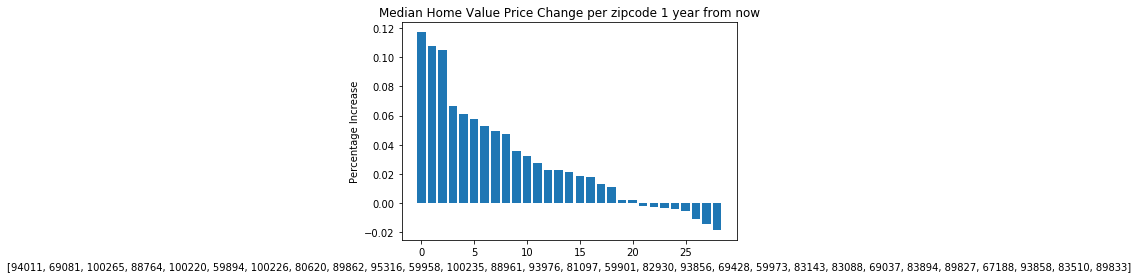

In [218]:
plt.bar([x for x in range(len(bestinvestment1yr))],height =[x[1]['1yrprofit'] for x in bestinvestment1yr])
plt.xlabel([x[0] for x in bestinvestment1yr])
plt.ylabel("Percentage Increase")
plt.title("Median Home Value Price Change per zipcode 1 year from now")
plt.savefig('1yr.png',bbox_inches='tight')

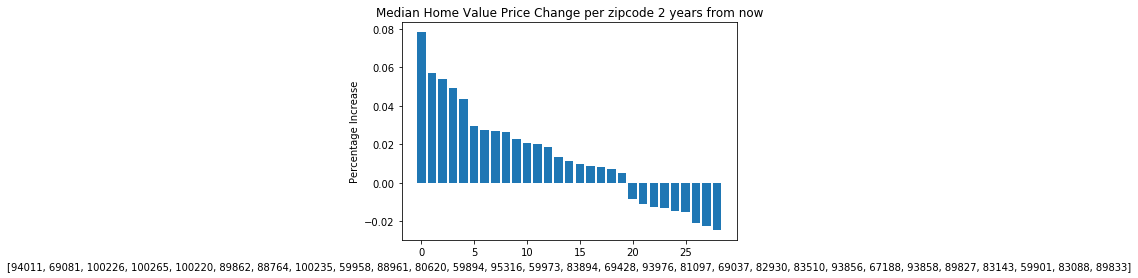

In [216]:
plt.bar([x for x in range(len(bestinvestment2yr))],height =[x[1]['2yrprofit'] for x in bestinvestment2yr])
plt.xlabel([x[0] for x in bestinvestment2yr])
plt.ylabel("Percentage Increase")
plt.title("Median Home Value Price Change per zipcode 2 years from now")
plt.savefig('2yr.png',bbox_inches='tight')

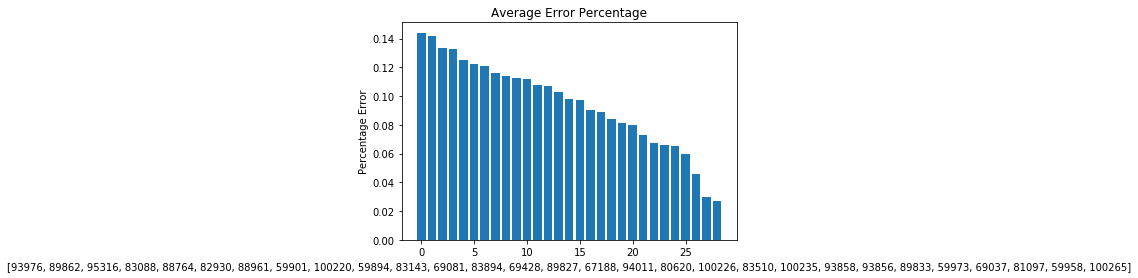

In [212]:
bestmape = newresults
bestmape.sort(key = lambda x: x[1]['mape'],reverse=True)
plt.bar([x for x in range(len(bestmape))],height =[x[1]['mape'] for x in bestmape])
plt.xlabel([x[0] for x in bestmape])
plt.ylabel("Percentage Error")
plt.title("Average Error Percentage")
plt.savefig('mape.png',bbox_inches='tight')

In [ ]:
#I attempted to use multiprocessing to make it take less time but it would not work on my computer
from multiprocessing import Pool,cpu_count
import multiprocessing
def testt(i):
    print("starting {}".format(i))
p = Pool(2)
p.map(testt,[0,1])

# Conclusion
My conclusion is that the error rate is not all that low, 15% or less, and that the profit to be made is not that high. If I was investing I would not buy at market price because the price might not go up very much or it could easily be wrong. I would make sure that I was getting a below market value price, then I would flip the house in the short term and sell within 1 year to make as much money as possible. I would do this for the top 5 zipcodes in the 1 year prediction to remain risk adverse. The odds that all the top 5 zipcodes spread across the whole country go down instead of up at the same time is low. 